In [30]:
import json
import urllib.request
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 150)

def retrieveId(keyword, searchOption, query = ""):
    data = urllib.request.urlopen(f"https://tablebuilder.singstat.gov.sg/api/table/resourceid?keyword={keyword}&searchOption={searchOption}").read().decode('utf-8')
    table_list = json.loads(data)['Data']['records']
    table_arr = []
    for table in table_list:
        if query.lower() in table['title'].lower():
            table_arr.append([table['title'], table['id']])
    table_df = pd.DataFrame(table_arr, columns=['title', 'id'])
    table_df.set_index('title', inplace=True)
    return table_df

def retrieveData(resourceId):
    data = urllib.request.urlopen(f"https://tablebuilder.singstat.gov.sg/api/table/tabledata/{resourceId}").read().decode("utf-8")
    return json.loads(data)

def retrieveMetaData(resourceId):
    return urllib.request.urlopen(f"https://tablebuilder.singstat.gov.sg/api/table/metadata/{resourceId}").read().decode("utf-8")



In [32]:
retail_ids = retrieveId("retail", "all", "")
retail_ids.to_excel("query_ids.xlsx", "retail_ids")
print(retail_ids)

                                                                                                           id
title                                                                                                        
Retail Sales Index, (2017 = 100), In Chained Volume Terms, Annual                                     M601901
Retail Sales Index, (2017 = 100), In Chained Volume Terms, Monthly                                    M601871
Average Retail Prices Of Selected Consumer Items, Annual                                              M212951
Online Retail Sales Proportion (Out Of The Respective Industry's Total Sales), Monthly                M601861
Retail Sales Value (Based On 2017=100 Index) - Estimated, Monthly                                     M601741
...                                                                                                       ...
Resident Working Persons Aged 15 Years and Over by Industry, Occupation and Sex                          8923
Forward An

In [4]:
# Retail Sales Index (Base 2017) 

data = retrieveData("M601901")
# retail_data = 
print(json.dumps(data, indent=4))

{
    "Data": {
        "id": "M601901",
        "title": "Retail Sales Index, (2017 = 100), In Chained Volume Terms, Annual",
        "footnote": "Link to latest RSI/FSI release is available via www.singstat.gov.sg/find-data/search-by-theme/industry/services/latest-data.  Relevant methodology paper is available via www.singstat.gov.sg/find-data/search-by-theme/industry/services/publications-and-methodology.",
        "frequency": "Annual",
        "datasource": "SINGAPORE DEPARTMENT OF STATISTICS",
        "generatedBy": "SingStat Table Builder",
        "dataLastUpdated": "05/05/2023",
        "dateGenerated": "10/09/2023",
        "offset": null,
        "limit": "2000",
        "sortBy": null,
        "timeFilter": null,
        "between": null,
        "search": null,
        "row": [
            {
                "seriesNo": "1",
                "rowText": "Total",
                "uoM": "Index",
                "footnote": "",
                "columns": [
                    {
 

In [5]:
rows = data['Data']['row']

rows_arr = []

for row in rows:
    row_dict = {}
    # row_dict['series_no'] = row['seriesNo']
    row_dict['type'] = row['rowText']
    for column in row['columns']:
        row_dict[column['key']] = float(column['value'])
    rows_arr.append(row_dict)

test_data = pd.DataFrame(rows_arr)
test_data.set_index('type', inplace=True)
print(test_data)

                                           1985    1986    1987    1988    1989     1990     1991     1992     1993     1994  ...     2013     2014     2015     2016   2017     2018     2019     2020     2021     2022
type                                                                                                                          ...                                                                                        
Total                                    25.124  22.312  27.553  34.439  38.330   39.162   39.702   43.567   45.826   45.145  ...   93.509   93.432   97.917   98.682  100.0   98.946   95.619   80.255   89.194   95.597
Department Stores                           NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN  ...  105.638  104.646  105.538  100.917  100.0  100.449   97.927   58.827   65.013   83.618
Supermarkets & Hypermarkets                 NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN  ..

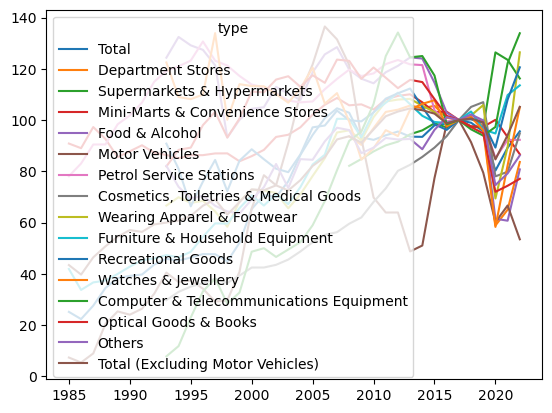

In [88]:
import matplotlib.pyplot as plt

transposed_data = test_data.transpose()

transposed_data.plot()
plt.show()